# Euler の一筆書き

In [88]:
import copy
from graphviz import Graph

In [89]:
class EulerianPath:
    def __init__(self, graph_array):
        """
        graph_array : array
            二次元配列。graph_array[i][j] > 0 <=> ノードiとノードjの間にエッジが存在
        """
        self.graph = graph_array
        self.size = len(graph_array)
        if self.size != len(graph_array[0]):
            raise Exception('入力配列の縦横サイズが異なります')
    
    def trail(self):
        for i_from in range(self.size):
            path, is_finished = self.__trail(i_from, self.graph)
            if is_finished:
                print('start={}, path={}'.format(i_from, path + [i_from]))
            else:
                print('start={}, No Path'.format(i_from))
    
    def __trail(self, i_from, graph):
        for i_to in range(len(self.graph)):
            g = copy.deepcopy(graph)
            if g[i_from][i_to] > 0:
                g[i_from][i_to] -= 1
                g[i_to][i_from] -= 1
                if sum(g[i_to]) == 0:
                    if sum([sum(l) for l in g]) == 0:
                        return [i_from, i_to], True
                    else:
                        return [i_from, i_to], False
                else:
                    p, is_finished = self.__trail(i_to, g)
                    if is_finished:
                        return [i_from] + p, True
        return [i_from], False

    def draw_graph(self):
        dot = Graph()
        dot.attr('node', shape='circle')
        for i in range(self.size):
            dot.node(str(i), str(i))
            for j in range(i, self.size):
                for k in range(self.graph[i][j]):
                    dot.edge(str(i), str(j))
        return dot

start=0, No Path
start=1, No Path
start=2, path=[2, 0, 1, 4, 2, 0, 3, 4, 2]
start=3, No Path
start=4, path=[4, 1, 0, 2, 0, 3, 4, 2, 4]


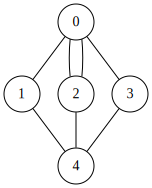

In [90]:
graph_array = [
    [0,1,2,1,0],
    [1,0,0,0,1],
    [2,0,0,0,1],
    [1,0,0,0,1],
    [0,1,1,1,0]
]
graph = EulerianPath(graph_array)
graph.trail()
graph.draw_graph()

start=0, path=[0, 1, 0, 2, 4, 2, 4, 1, 3, 0, 0]
start=1, path=[1, 0, 1, 4, 2, 4, 2, 0, 3, 1, 1]
start=2, path=[2, 0, 1, 0, 3, 1, 4, 2, 4, 2, 2]
start=3, path=[3, 0, 1, 0, 2, 4, 2, 4, 1, 3, 3]
start=4, path=[4, 1, 0, 1, 3, 0, 2, 4, 2, 4, 4]


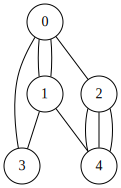

In [91]:
graph_array = [
    [0,2,1,1,0],
    [2,0,0,1,1],
    [1,0,0,0,3],
    [1,1,0,0,0],
    [0,1,3,0,0]
]
graph = EulerianPath(graph_array)
graph.trail()
graph.draw_graph()

start=0, No Path
start=1, No Path
start=2, No Path
start=3, No Path
start=4, No Path


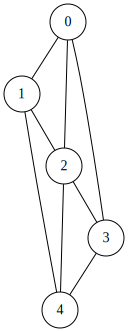

In [92]:
graph_array = [
    [0,1,1,1,0],
    [1,0,1,0,1],
    [1,1,0,1,1],
    [1,0,1,0,1],
    [0,1,1,1,0]
]
graph = EulerianPath(graph_array)
graph.trail()
graph.draw_graph()